In [422]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Specify the file path
file_path = "acquisitions/synthetic_test/processed/processed_all_actions.csv"

# Import the CSV file into a DataFrame
df = pd.read_csv(file_path)


In [416]:
# df_name = ["processed_rotation_bowl_z.csv", "processed_rotation_bowl_y.csv", "processed_rotation_bowl_x.csv", "processed_floating_bowl_z.csv", "processed_floating_bowl_y.csv", "processed_floating_bowl_x.csv", "processed_hammer_bowl_z.csv", "processed_hammer_bowl_y.csv", "processed_hammer_bowl_x.csv", "processed_hammer_bowl_z.csv", "processed_hammer_bowl_y.csv", "processed_hammer_bowl_x.csv", "processed_hammer_bowl_z.csv", "processed_hammer_bowl_y.csv", "processed_hammer_bowl_x.csv", "processed_hammer_bowl_z.csv", "processed_hammer_bowl_y.csv", "processed_hammer_bowl_x.csv", "processed_hammer_bowl_z.csv", "processed_hammer_bowl_y.csv", "processed_hammer_bowl_x.csv", "processed_hammer_bowl_z.csv", "processed_hammer_bowl_y.csv", "processed_hammer_bowl_x.csv", "processed_hammer_bowl_z.csv", "processed_hammer_bowl_y.csv", "processed_hammer_bowl_x.csv", "processed_impact_bowl_z.csv", "processed_impact_bowl_y.csv", "processed_impact_bowl_x.csv"]
# folder_path = "acquisitions/synthetic_test/processed/"
# # merge all the dataframes one after the other
# df = pd.DataFrame()
# for name in df_name:
#     df = pd.concat([df, pd.read_csv(folder_path + name)], ignore_index=True)

# # save the merged dataframe
# df.to_csv(folder_path + "processed_all.csv", index=False)

# add series_id column as second column which represents the series of the action
# df.insert(1, "series_id", np.nan)

# # fill series_id with numbers corresponding to the 'action' column
# df['series_id'] = df.groupby('action').ngroup()

# save the dataframe
# df.to_csv("acquisitions/synthetic_test/processed/new_processed_all_actions.csv", index=False)



In [417]:
# order df by series_id
# df = df.sort_values(by=['series_id', 'packet_id'])

# # reset index
# df = df.reset_index(drop=True)

# # rename 'packet_id' column to 'measurement_id'
# df.rename(columns={'packet_id':'measurement_id'}, inplace=True)


KeyError: 'packet_id'

In [423]:
df

,_time,series_id,measurement_id,action,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,quat_x,quat_y,quat_z,quat_w
0,2023-12-29 16:50:56.247487,0,0,floating_x,1.865854,0.323171,0.243902,0.004321,-0.004956,0.010840,-0.70,0.68,0.21,0.10
1,2023-12-29 16:50:56.262481,0,1,floating_x,1.865854,0.323171,0.243902,0.004321,-0.004956,0.010840,-0.70,0.68,0.21,0.10
2,2023-12-29 16:50:56.276026,0,2,floating_x,1.743902,-0.164634,0.182927,0.004077,0.000659,0.006201,-0.70,0.68,0.21,0.10
3,2023-12-29 16:50:56.291837,0,3,floating_x,0.280488,-1.506098,0.243902,0.003345,-0.003735,-0.007471,-0.70,0.68,0.21,0.10
4,2023-12-29 16:50:56.306791,0,4,floating_x,-0.878049,-1.567073,-0.060976,0.004565,-0.008130,-0.011377,-0.70,0.68,0.21,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452,2023-12-29 16:58:16.012691,11,296,rotation_z,1.079268,54.853659,10.439024,0.135425,-0.475269,-0.611646,0.93,0.16,0.24,0.22
3453,2023-12-29 16:58:16.184144,11,297,rotation_z,5.957317,49.792683,10.378049,0.147876,-0.475513,-0.609692,0.93,0.16,0.25,0.22
3454,2023-12-29 16:58:16.191118,11,298,rotation_z,23.213415,29.792683,10.378049,0.176685,-0.476489,-0.608472,0.92,0.18,0.27,0.21
3455,2023-12-29 16:58:16.196101,11,299,rotation_z,41.079268,2.292683,10.256098,0.208911,-0.498950,-0.618970,0.92,0.18,0.28,0.19


In [425]:
df.describe()

,series_id,measurement_id,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,quat_x,quat_y,quat_z,quat_w
count,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000
mean,5.216951,170.265259,-4.114510,0.755942,-0.869745,-0.106049,-0.097238,0.046940,0.051449,0.272953,0.070223,0.254709
std,3.722790,121.300390,71.090067,74.537029,65.122563,0.437289,0.338756,0.441120,0.630403,0.530645,0.357432,0.216536
min,0.000000,0.000000,-777.884146,-337.158537,-232.682927,-1.948242,-2.094897,-0.991528,-0.980000,-0.980000,-0.990000,0.000000
25%,2.000000,72.000000,-8.073171,-9.926829,-15.280488,-0.266504,-0.099365,-0.023169,-0.610000,-0.210000,-0.170000,0.070000
50%,5.000000,149.000000,0.146341,0.030488,-0.146341,-0.001611,-0.008472,0.007153,0.210000,0.530000,0.100000,0.180000
75%,9.000000,248.000000,15.128049,10.182927,6.024390,0.033301,0.009595,0.091650,0.640000,0.690000,0.320000,0.430000
max,11.000000,500.000000,203.975610,576.463415,715.134146,1.710742,0.819019,2.023047,0.990000,0.990000,1.000000,0.970000


ValueError: setting an array element with a sequence.

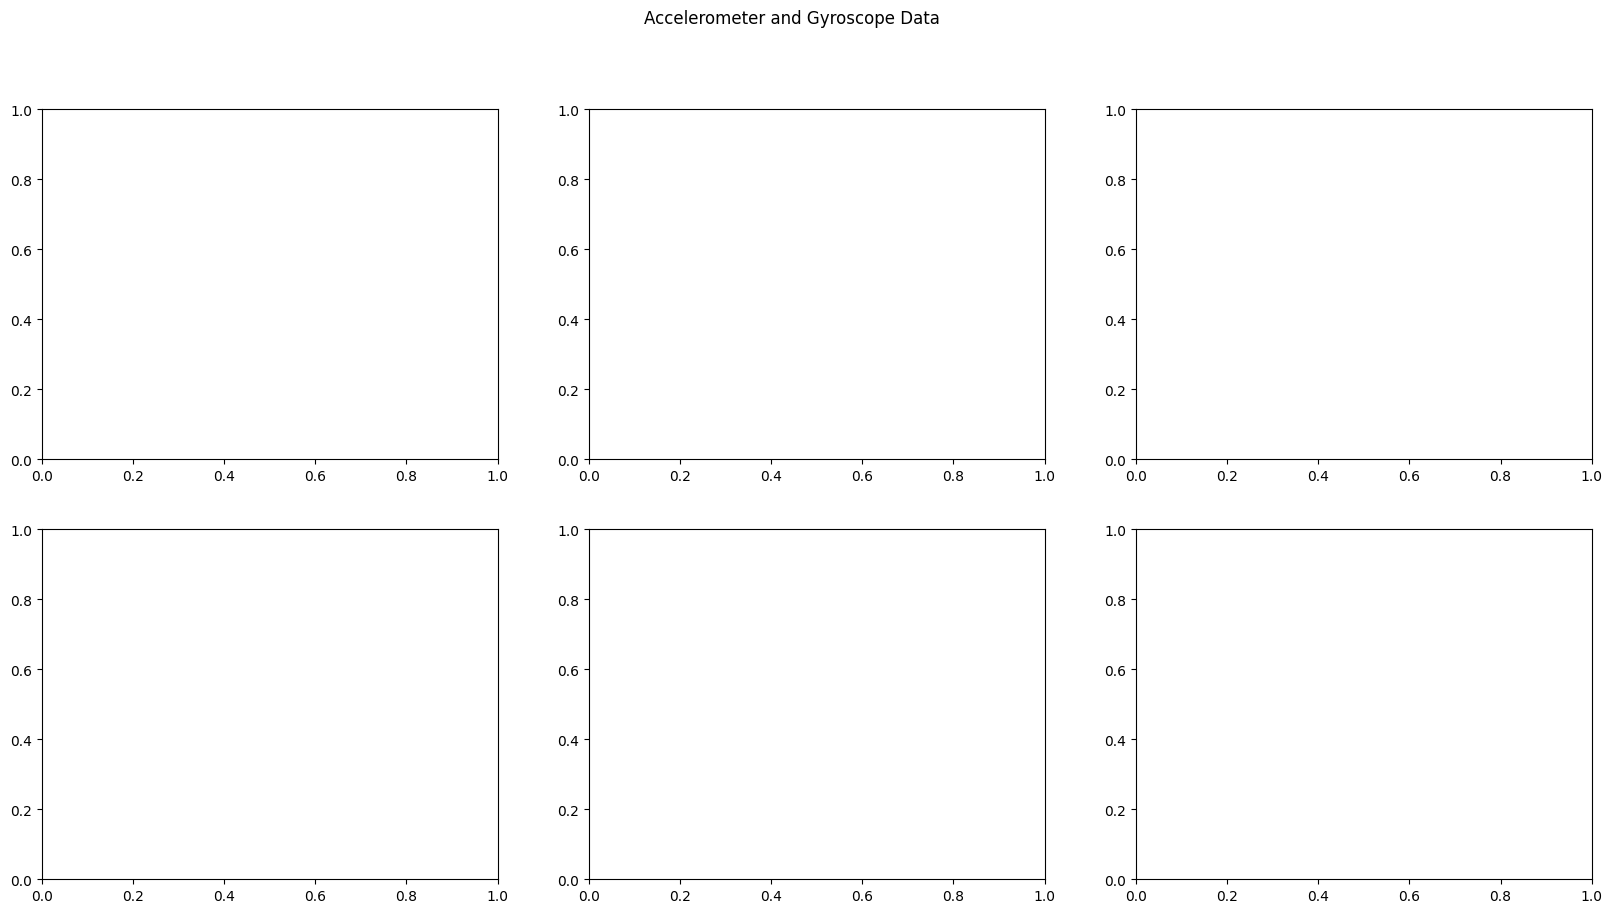

In [424]:
# make a 2x3 plot of the accelerometer and gyroscope data
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.suptitle('Accelerometer and Gyroscope Data')
features=['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
count = 0

# group the data by series_id and measurement_id and plot the data
for i in range(2):
    for j in range(3):
        axs[i,j].plot(df.groupby(['series_id', 'measurement_id'])[features[count]].mean())
        axs[i,j].set_title(features[count])
        count += 1

# add column 'action' to the dataframe equal to 'floating_x' after 'packet_id' column
# df.insert(2, 'action', 'rotation_z')
# move action column to second column

# remove time_diff
# df = df.drop(columns=['time_diff'])
# save a new csv file with the data from packet_id 200 to the end
# df = df[200:]
# # renumber the packet_id column from 0
# df['packet_id'] = np.arange(len(df))
# # save the new csv file
# df.to_csv(file_path, index=False)


In [358]:
df

,_time,packet_id,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,quat_x,quat_y,quat_z,quat_w,time_diff,action
0,2023-12-29 16:50:56.247487,0,1.865854,0.323171,0.243902,0.004321,-0.004956,0.010840,-0.70,0.68,0.21,0.10,0.000000,floating_x
1,2023-12-29 16:50:56.262481,1,1.865854,0.323171,0.243902,0.004321,-0.004956,0.010840,-0.70,0.68,0.21,0.10,0.014994,floating_x
2,2023-12-29 16:50:56.276026,2,1.743902,-0.164634,0.182927,0.004077,0.000659,0.006201,-0.70,0.68,0.21,0.10,0.013545,floating_x
3,2023-12-29 16:50:56.291837,3,0.280488,-1.506098,0.243902,0.003345,-0.003735,-0.007471,-0.70,0.68,0.21,0.10,0.015811,floating_x
4,2023-12-29 16:50:56.306791,4,-0.878049,-1.567073,-0.060976,0.004565,-0.008130,-0.011377,-0.70,0.68,0.21,0.10,0.014954,floating_x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2023-12-29 16:51:10.827886,296,5.341463,-0.896341,6.036585,0.108569,-0.017896,-0.037012,-0.09,0.98,0.08,0.16,0.059987,floating_x
297,2023-12-29 16:51:10.948567,297,8.207317,-0.347561,5.121951,0.107837,-0.023022,-0.046289,-0.09,0.98,0.08,0.16,0.120681,floating_x
298,2023-12-29 16:51:11.007118,298,9.731707,-0.591463,5.182927,0.112964,-0.028149,-0.055078,-0.08,0.98,0.07,0.16,0.058551,floating_x
299,2023-12-29 16:51:11.010865,299,9.914634,-1.567073,5.304878,0.111987,-0.042798,-0.063379,-0.10,0.98,0.07,0.16,0.003747,floating_x


In [348]:
# convert the _time column to datetime for time series analysis
df['_time'] = pd.to_datetime(df['_time'])
# remove 'packet_id' and 'time_diff' from dataframe
df = df.drop(['packet_id', 'time_diff'], axis=1)

# resample the data
sample_time = '0.07S'
df = df.resample(sample_time, on='_time').mean()
df = df.reset_index()

# interpolate the data to fill in missing values
df = df.interpolate(method='linear', limit_direction='both')

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   _time    97 non-null     datetime64[ns]
 1   gyro_x   97 non-null     float64       
 2   gyro_y   97 non-null     float64       
 3   gyro_z   97 non-null     float64       
 4   accel_x  97 non-null     float64       
 5   accel_y  97 non-null     float64       
 6   accel_z  97 non-null     float64       
 7   quat_x   97 non-null     float64       
 8   quat_y   97 non-null     float64       
 9   quat_z   97 non-null     float64       
 10  quat_w   97 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 8.5 KB


In [312]:
# # add 192 new rows as zero padding
# df = pd.concat([df, pd.DataFrame(np.zeros((192, df.shape[1])), columns=df.columns)])
# # renumber the packet_id column from 0
# df['packet_id'] = np.arange(len(df))

In [350]:

def mfft(x, length):
    return [x/math.sqrt(length) for x in np.absolute(np.fft.fft(x))][1:]

# create a new dataframe to store the fft data
fft_df = pd.DataFrame({
    'id': [np.arange(0, len(df), 1).tolist()],
    'accelx': [df['accel_x'].values],
    'accely': [df['accel_y'].values],
    'accelz': [df['accel_z'].values],
    'gyrox': [df['gyro_x'].values],
    'gyroy': [df['gyro_y'].values],
    'gyroz': [df['gyro_z'].values]
})

# apply the mfft function to each column
fft_df['accelx_f'] = [ mfft(x, len(x)) for x in fft_df['accelx'].values ]
fft_df['accely_f'] = [ mfft(x, len(x)) for x in fft_df['accely'].values ]
fft_df['accelz_f'] = [ mfft(x, len(x)) for x in fft_df['accelz'].values ]
fft_df['gyrox_f'] = [ mfft(x, len(x)) for x in fft_df['gyrox'].values ]
fft_df['gyroy_f'] = [ mfft(x, len(x)) for x in fft_df['gyroy'].values ]
fft_df['gyroz_f'] = [ mfft(x, len(x)) for x in fft_df['gyroz'].values ]

In [351]:
fft_df

,id,accelx,accely,accelz,gyrox,gyroy,gyroz,accelx_f,accely_f,accelz_f,gyrox_f,gyroy_f,gyroz_f
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0125, -0.00290527343749993, 0.0172851562500...","[-0.0079833984374999, -0.0013916015624999458, ...","[-0.005688476562499999, -0.0009033203125000496...","[-1.6341463414634143, 0.14024390243902501, -0....","[1.2865853658536586, -1.0243902439024393, -13....","[-2.914634146341464, 1.9390243902439028, 8.713...","[0.5555119230987589, 2.1526288675494736, 1.745...","[0.7893288553464316, 1.3436253685666923, 1.674...","[1.791513098061643, 1.8604050212806957, 0.6066...","[381.40347516937305, 139.1513452476493, 160.61...","[1037.6701629588865, 110.21358619400173, 82.68...","[1155.1777311246278, 358.31493477043347, 488.7..."


In [352]:
def aggf(d, feature):
    va= np.array(d[feature].tolist())
    mean= sum(va)/va.shape[0]
    var= sum([ (va[i,:]-mean)**2 for i in range(va.shape[0]) ])/va.shape[0]
    dev= [ math.sqrt(x) for x in var ]
    return pd.DataFrame({
        'mean': [ mean ],
        'dev' : [ dev ],
    })

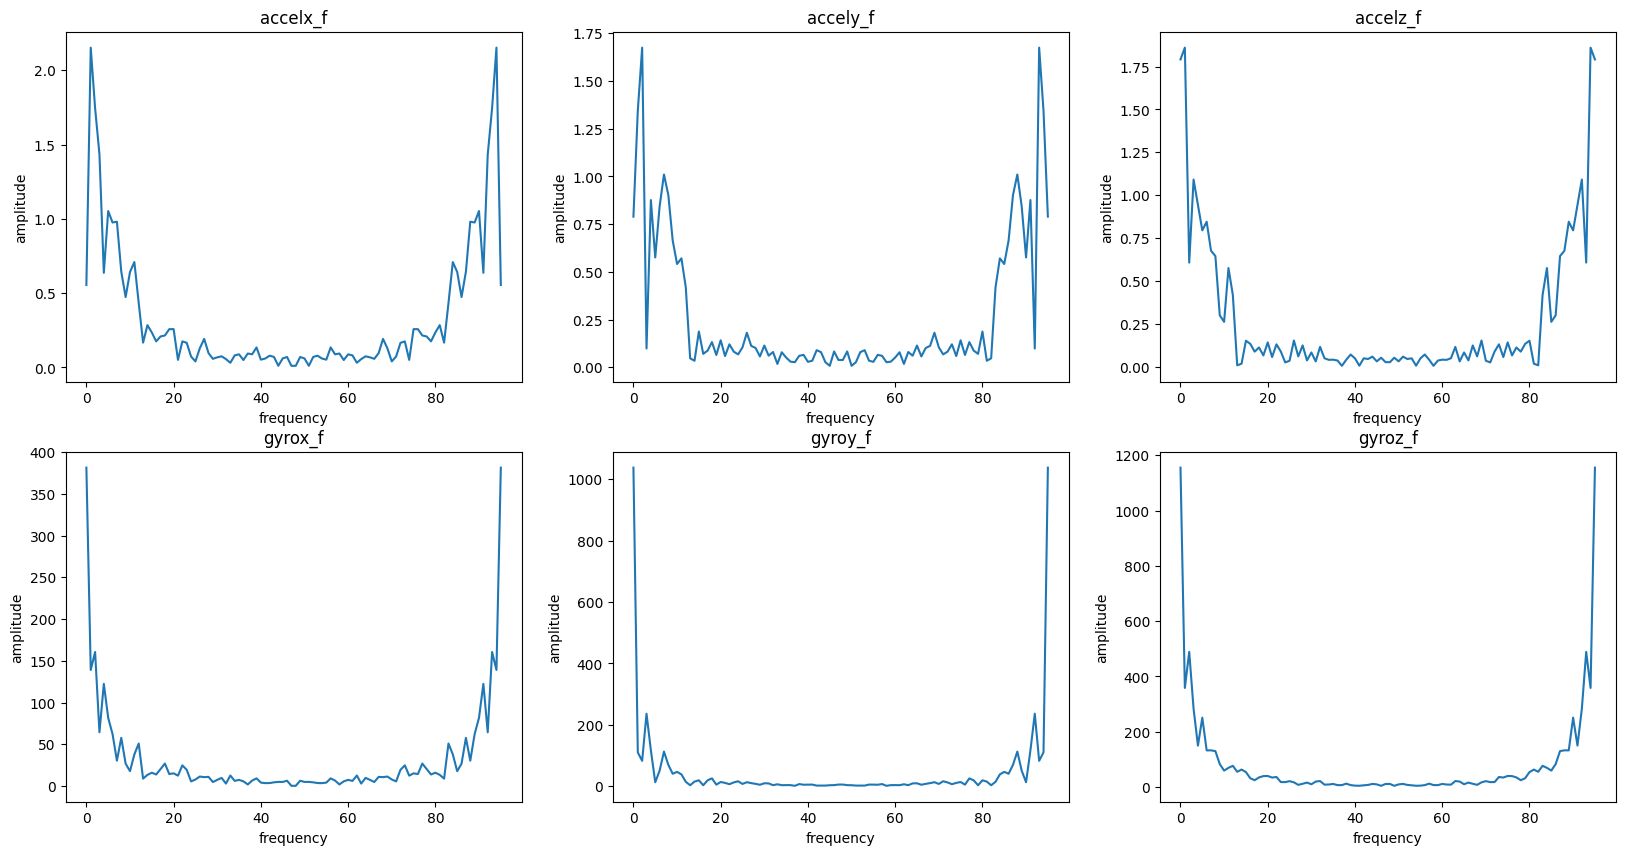

In [353]:
features=['accelx_f', 'accely_f', 'accelz_f', 'gyrox_f', 'gyroy_f', 'gyroz_f']
count=0

# make a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(20,10))

for feature in features:
    # get the mean and deviation of the fft data
    df = aggf(fft_df, feature)
    # plot the mean
    axs[count//3, count%3].plot(df['mean'][0])
    # set the title
    axs[count//3, count%3].set_title(feature)
    # set the x-axis label
    axs[count//3, count%3].set_xlabel('frequency')
    # set the y-axis label
    axs[count//3, count%3].set_ylabel('amplitude')
    count += 1

plt.show()
